In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('car_crashes')

In [4]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [36]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [7]:
df.isnull().mean()*100

total             0.0
speeding          0.0
alcohol           0.0
not_distracted    0.0
no_previous       0.0
ins_premium       0.0
ins_losses        0.0
abbrev            0.0
dtype: float64

### Univariate Analysis

#### Histogram

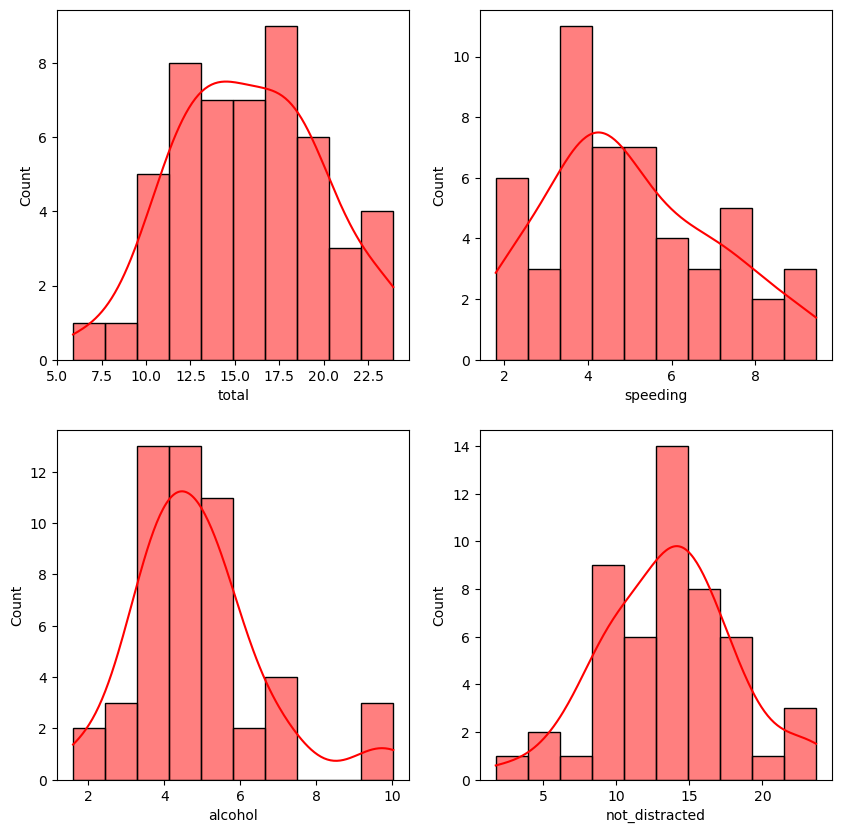

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x='total',kde=True,bins=10,color='red')

plt.subplot(2,2,2)
sns.histplot(data=df,x='speeding',kde=True,bins=10,color='red')

plt.subplot(2,2,3)
sns.histplot(data=df,x='alcohol',kde=True,bins=10,color='red')

plt.subplot(2,2,4)
sns.histplot(data=df,x='not_distracted',kde=True,bins=10,color='red')


plt.show()


#### Box plot

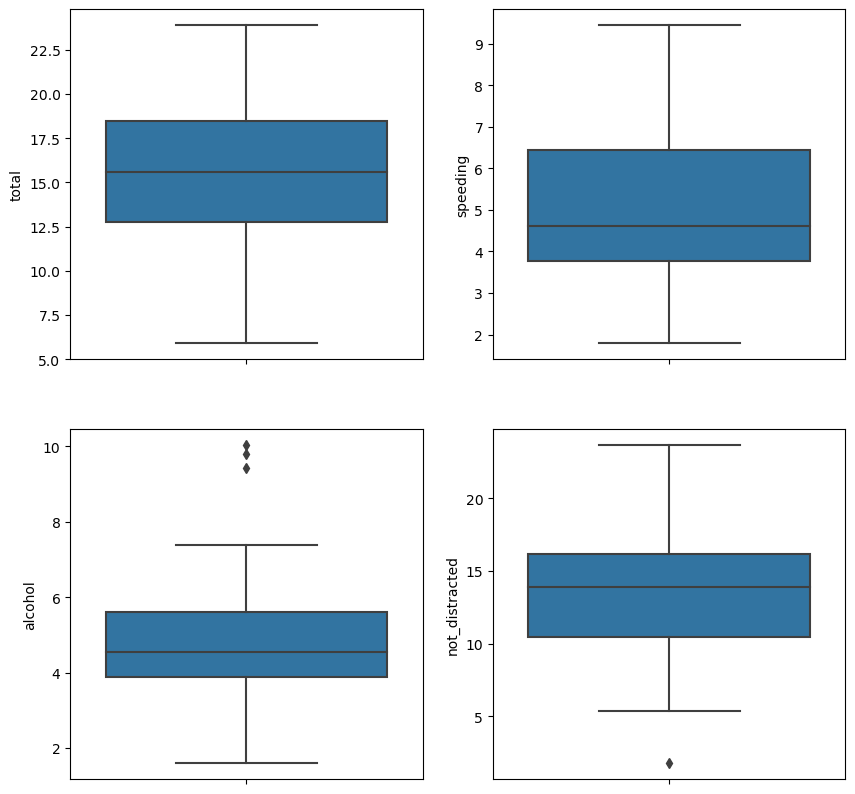

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,y='total')

plt.subplot(2,2,2)
sns.boxplot(data=df,y='speeding')

plt.subplot(2,2,3)
sns.boxplot(data=df,y='alcohol')

plt.subplot(2,2,4)
sns.boxplot(data=df,y='not_distracted')

plt.show()


## Multivariate Analysis

#### Bar plot

In [10]:
speed_alcohol=df.groupby(['speeding'])['alcohol'].mean()
speed_alcohol

speeding
1.792     3.136
1.886     2.870
1.937     5.215
2.006     1.593
2.208     2.784
2.413     3.429
2.640     5.456
2.669     3.925
2.964     3.900
3.384     3.948
3.496     4.968
3.625     4.205
3.759     5.191
3.774     4.218
3.936     3.567
3.948     4.794
4.032     5.824
4.060     3.480
4.066     4.922
4.080     4.080
4.095     5.655
4.200     3.360
4.224     3.328
4.250     4.000
4.452     3.498
4.608     4.352
4.806     4.272
4.859     1.808
4.968     4.221
5.032     3.808
5.439     4.704
5.497    10.038
5.508     4.437
5.738     4.530
6.014     6.402
6.156     4.860
6.368     5.771
6.510     5.208
6.552     5.208
6.923     5.474
7.175     6.765
7.308     5.568
7.332     5.640
7.421     4.525
7.760     7.372
8.092     6.664
8.346     9.416
9.082     9.799
9.100     5.642
9.450     7.175
Name: alcohol, dtype: float64

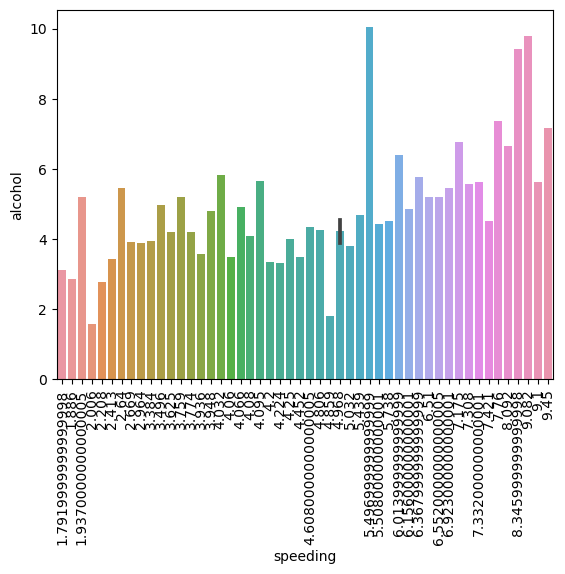

In [13]:
sns.barplot(x='speeding',y='alcohol', data=df)
plt.xticks(rotation = 90)
plt.show()

In [14]:
speed_total=df.groupby(['speeding'])['total'].mean()
speed_alcohol

speeding
1.792     3.136
1.886     2.870
1.937     5.215
2.006     1.593
2.208     2.784
2.413     3.429
2.640     5.456
2.669     3.925
2.964     3.900
3.384     3.948
3.496     4.968
3.625     4.205
3.759     5.191
3.774     4.218
3.936     3.567
3.948     4.794
4.032     5.824
4.060     3.480
4.066     4.922
4.080     4.080
4.095     5.655
4.200     3.360
4.224     3.328
4.250     4.000
4.452     3.498
4.608     4.352
4.806     4.272
4.859     1.808
4.968     4.221
5.032     3.808
5.439     4.704
5.497    10.038
5.508     4.437
5.738     4.530
6.014     6.402
6.156     4.860
6.368     5.771
6.510     5.208
6.552     5.208
6.923     5.474
7.175     6.765
7.308     5.568
7.332     5.640
7.421     4.525
7.760     7.372
8.092     6.664
8.346     9.416
9.082     9.799
9.100     5.642
9.450     7.175
Name: alcohol, dtype: float64

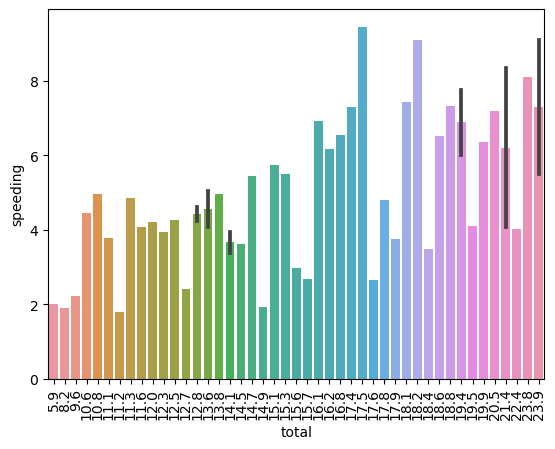

In [16]:
sns.barplot(x='total',y='speeding', data=df)
plt.xticks(rotation = 90)
plt.show()

#### Area plot

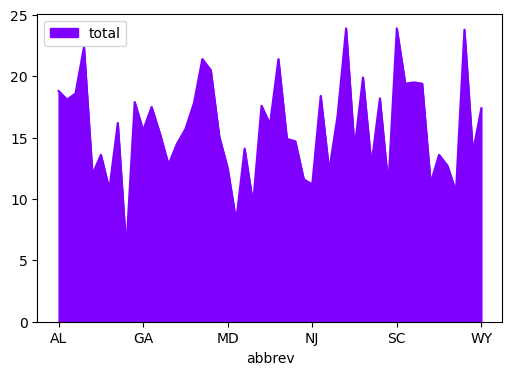

In [17]:
df.plot.area('abbrev','total',figsize=(6,4),cmap='rainbow');

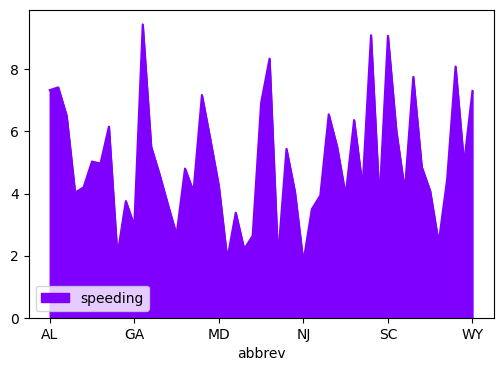

In [18]:
df.plot.area('abbrev','speeding',figsize=(6,4),cmap='rainbow');

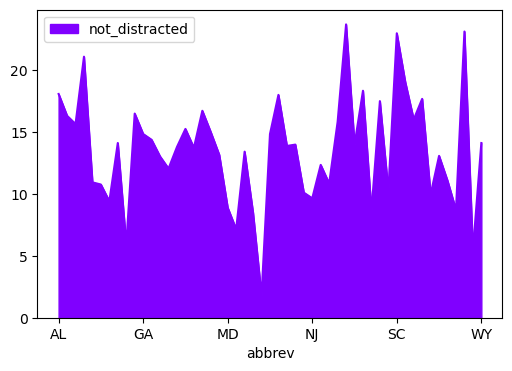

In [19]:
df.plot.area('abbrev','not_distracted',figsize=(6,4),cmap='rainbow');

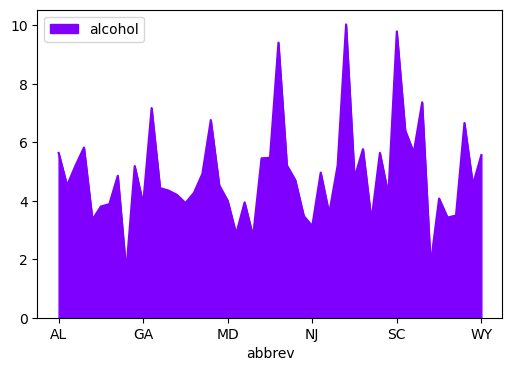

In [20]:
df.plot.area('abbrev','alcohol',figsize=(6,4),cmap='rainbow');

### Line chart

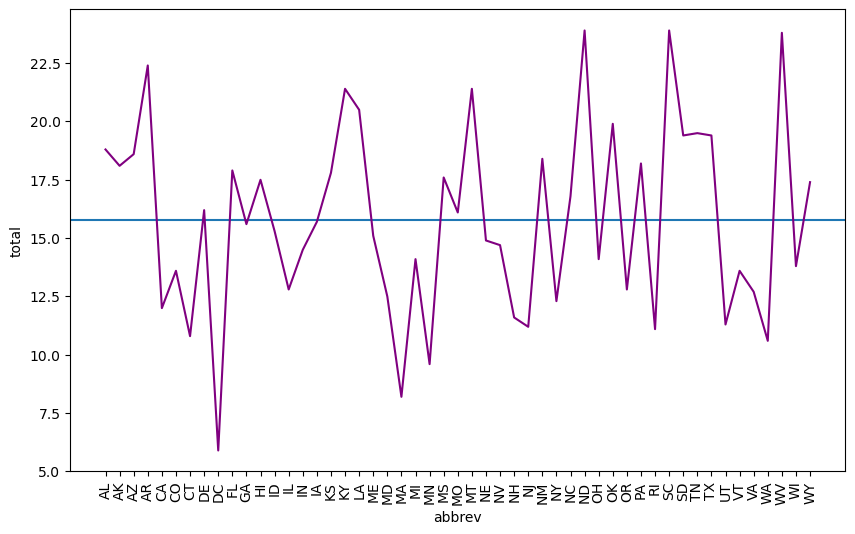

In [32]:
plt.figure(figsize=(10,6))
plt.axhline(y=df.total.mean())
sns.lineplot(data=df,x='abbrev',y='total',color='purple')
plt.xticks(rotation = 90)
plt.show() 

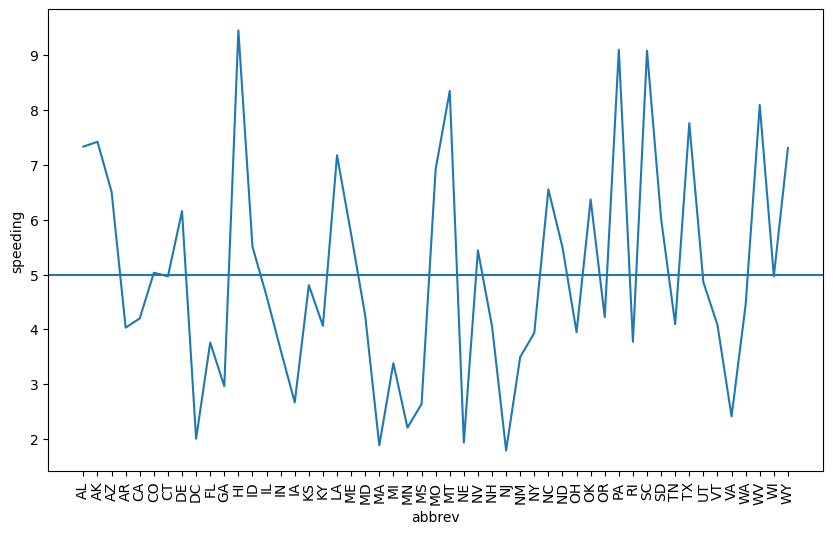

In [33]:
plt.figure(figsize=(10,6))
plt.axhline(y=df.speeding.mean())
sns.lineplot(data=df,x='abbrev',y='speeding')
plt.xticks(rotation = 90)
plt.show() 

### Reg plot

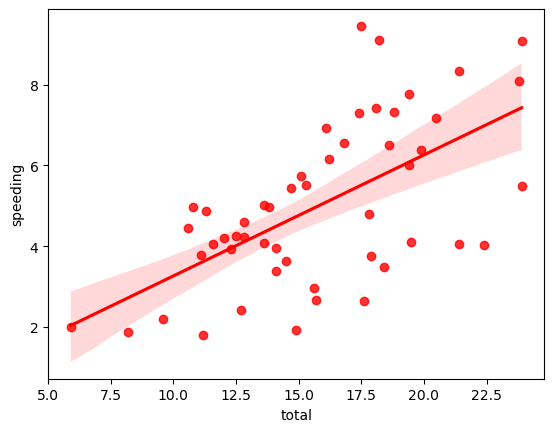

In [39]:
sns.regplot(data = df, x = 'total', y= 'speeding',color='red')
plt.show()

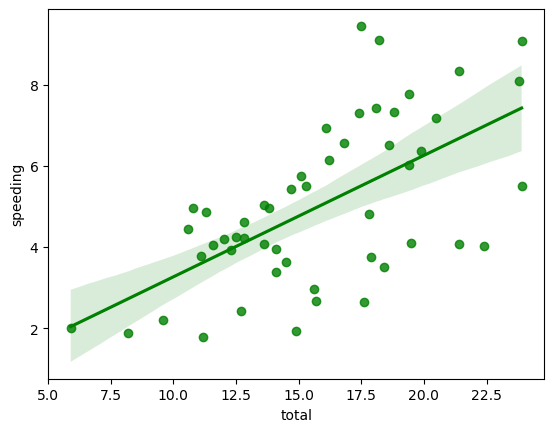

In [40]:
sns.regplot(data = df, x = 'total', y= 'speeding',color='green')
plt.show()

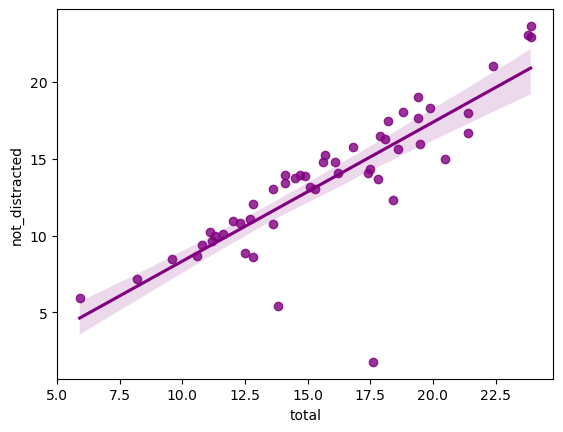

In [41]:
sns.regplot(data = df, x = 'total', y= 'not_distracted',color='purple')
plt.show()

### Scatter plot

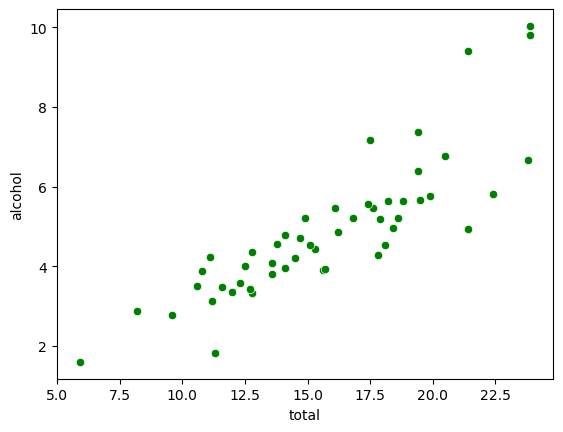

In [44]:
sns.scatterplot(data=df, x='total',y='alcohol',color='green')
plt.show()

### Heatmap

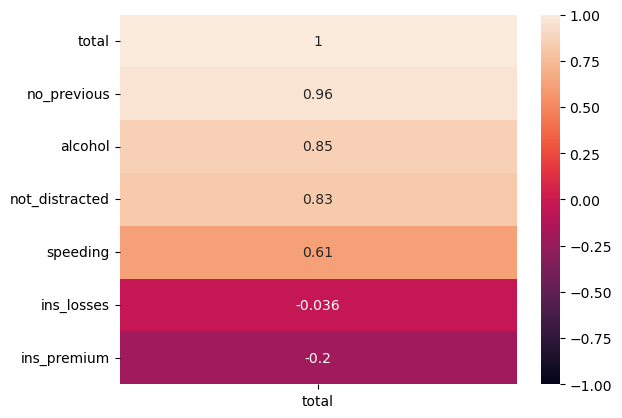

In [42]:
sns.heatmap(df.corr()[['total']].sort_values(by='total', ascending=False), vmax=1, vmin=-1, annot=True);

In [45]:
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL
